In [2]:
import pandas as pd

# Load the provided CSV file to inspect its contents
file_path = '/content/microsoft_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()


,Date,Open,High,Low,Close,Volume
0,09/13/2024,425.83,431.83,425.46,430.59,"15,874,560"
1,09/12/2024,423.31,427.37,419.75,427.00,"17,418,760"
2,09/11/2024,415.50,423.99,409.58,423.04,"19,266,920"
3,09/10/2024,408.20,416.33,407.70,414.20,"19,594,289"
4,09/09/2024,407.24,408.65,402.15,405.72,"15,295,130"


Future forecast values for the next 7 days:
2024-09-16    431.827658
2024-09-17    432.952385
2024-09-18    433.807280
2024-09-19    434.234659
2024-09-20    434.517458
2024-09-23    434.693825
2024-09-24    434.817133
Freq: B, Name: predicted_mean, dtype: float64


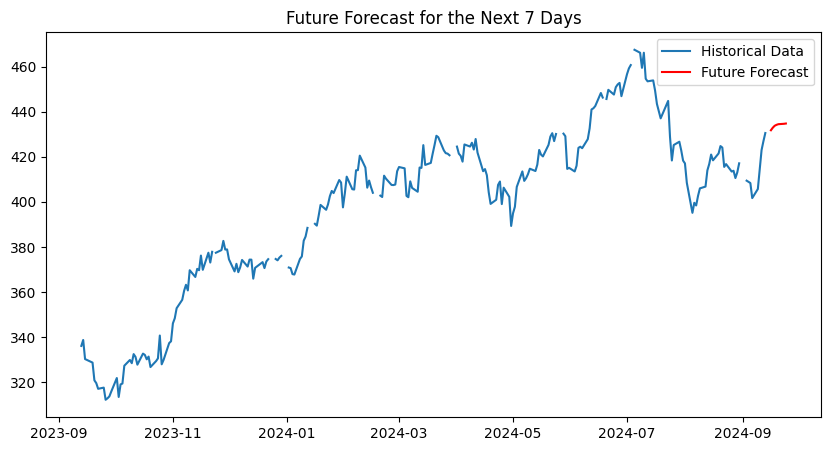

In [108]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'microsoft_data.csv'  # Adjust the file path as per your environment
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the data by date to ensure it's monotonic
df = df.sort_values(by='Date')

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Ensure the date index has a frequency of business days (if it doesn't have a frequency)
df = df.asfreq('B')

# Use the 'Close' column for ARIMA modeling
close_prices = df['Close'].astype(float)  # Ensure 'Close' is treated as float

# Fit the ARIMA model on the entire dataset
model = ARIMA(close_prices, order=(5, 1, 0))
model_fit = model.fit()

# Forecast future values for the next 7 days
future_steps = 7
future_forecast = model_fit.forecast(steps=future_steps)

# Generate future date range starting from the last available date
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, freq='B')[1:]  # Business days only

# Create a forecast series for the future values
future_forecast_series = pd.Series(future_forecast, index=future_dates)

# Print the future forecast values
print("Future forecast values for the next 7 days:")
print(future_forecast_series)

# Plot historical data with future forecast
plt.figure(figsize=(10, 5))
plt.plot(close_prices, label='Historical Data')
plt.plot(future_forecast_series, label='Future Forecast', color='red')
plt.legend()
plt.title("Future Forecast for the Next 7 Days")
plt.show()


In [128]:
import pandas as pd

# Ask the user for a specific future date to predict the stock price
user_input = input("Enter the date for which you want to predict the closing price (YYYY-MM-DD): ")
predicted_date = pd.to_datetime(user_input)

# Check if the date is after the last date in the dataset
if predicted_date <= df.index[-1]:
    print(f"Error: The input date {user_input} must be after the last available date {df.index[-1]}.")
else:
    # Calculate the number of business days between the last date in the dataset and the user's input date
    future_periods = (predicted_date - df.index[-1]).days

    # Forecast for the user-provided future date
    future_forecast = model_fit.forecast(steps=future_periods)

    # Create a future date range
    future_dates = pd.date_range(df.index[-1], periods=future_periods+1, freq='B')[1:]

    # Find the forecast for the requested date
    future_forecast_series = pd.Series(future_forecast, index=future_dates)

    # Print the predicted value
    if predicted_date in future_forecast_series.index:
        print(f"Predicted closing price on {user_input}: {future_forecast_series[predicted_date]}")
    else:
        print(f"No prediction available for the date {user_input}.")


Enter the date for which you want to predict the closing price (YYYY-MM-DD): 2024-10-10
Predicted closing price on 2024-10-10: 435.01987197041234
